# Tópico 12:  Lógica Fuzzy

A Lógica Fuzzy é uma técnica de Inteligência Computacional muito empregada em sistemas de controle e sistemas baseados em conhecimento.

Ela permite a utilização de um banco de regras semânticas que é utilizado para gerar inferências sobre dados em escalas numéricas.

Também existem algoritmos de Agrupamento baseados em lógica fuzzy, muito usados em **Segmentação de Imagens** com ruído.

## Exemplo 1 - Problema da Gorjeta

Vamos criar um sistema para decidir o valor da gorjeta a ser dada em um restaurante. Este sistema deverá levar em consideração a qualidade do serviço e a qualidade da comida, em uma escala de 0 a 10. 
Este exemplo está disponível em https://pythonhosted.org/scikit-fuzzy/auto_examples/

**Inputs:**
- <span style="color:blue">Serviço:</span> Qual bom foi o serviço em uma escala de 0 à 10? (Universo ou range do variável crisp) Ou, em escala semântica, poderíamos ter ruim, aceitável e excelente (Conjunto difuso ou range da variável fuzzy)
- <span style="color:blue">Comida:</span>  Qual boa foi a comida em uma escala de 0 à 10? (Universo = 0-10), ruim, boa, ótima (conjunto fuzzy)

**Output:**
- <span style="color:blue">Gorjeta:</span>  quanto devo dar de gorjeta em relação ao valor pago, de 0% à 25%? (universo). Devo pagar pouco, moderado, ou muito? (conjunto fuzzy)

**Regras:**
- Se o <span style="color:blue">serviço</span> foi **bom** OU a qualidade da <span style="color:blue">comida</span> foi **boa**, então a <span style="color:blue">gorjeta</span> será **alta**.  
- Se o <span style="color:blue">serviço</span> foi **mediano** , então a <span style="color:blue">gorjeta</span> será **mediana**.  
- Se o <span style="color:blue">serviço</span> foi **ruim** E a qualidade da <span style="color:blue">comida</span> foi **ruim**, então a <span style="color:blue">gorjeta</span> será **baixa**.  

### (a) Lógica Clássica

Se fossemos usar a Lógica Clássica, poderíamos encadear comandos IF/ELSE comparando sobre operadores lógicos tradicionais. Entretanto, precisariamos mapear cada valor para um conjunto disjunto. Vejamos uma solução plausível:

In [6]:
def gorjeta(servico, comida):
    # Mapeando os ranges de INPUT e OUTPUT
    mapa_input = {
        'ruim': 4,
        'mediano': 7,
        'bom': 10
    }
    mapa_output = {
        'baixa': 8.33,
        'mediana':16.66,
        'alta':25
    }
    
    # Definindo as regras
    gorjeta=''
    if (servico > mapa_input['mediano']) or (servico > mapa_input['mediano']):
        gorjeta = 'alta'
    elif (servico > mapa_input['ruim']) and (servico <= mapa_input['mediano']): # AND usado para definir intervalo
        gorjeta = 'mediana'
    elif (servico <= mapa_input['ruim']) and (comida <= mapa_input['ruim']): 
        gorjeta = 'baixa'
        
    return(mapa_output[gorjeta])    

In [7]:
print( gorjeta(9.8, 6.5) )
print( gorjeta(4, 4) )
print( gorjeta(2, 2) )
#print( gorjeta(4, 6) )

25
8.33
8.33


Percebemos que temos, principalmente, 2 problemas:
1) O intervalo de valores que definimos é muito curto, então várias entradas diferentes geram a mesma saída (esse problema esta relacionado ao fato de na lógica clássica os conjuntos serem disjuntos)

2) Com o número de regras usado, existem casos possiveis que não são tratados e a função criada não sabe o que fazer com esses casos

### (b) Lógica Fuzzy

In [8]:
!pip install -U scikit-fuzzy # Para instalar biblioteca de Lógica Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

### <span style="color:purple">1 - Fuzzificação</span>

Definindo os INPUTS (antecedentes). Perceba que o range vai de 0 à 10 para as notas e de 0% à 25% para a gorjeta.

In [10]:
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

Podemos ver o universo de valores crisp através de:

In [11]:
comida.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Agora precisamos definir o mapeamento dos valores semânticos das variáveis difusas.

Perceba que estamos trabalhando com 3 valores (ruim, mediano, bom) ou sinônimos desses.

A biblioteca skfuzzy permite usar o método **automf** para popular **automaticamente** as funções de pertinência (membership functions) que mapeiam os valores para os grupos semânticos.

Neste caso estamos usando uma Auto-membership function do tipo **trimf**, ou seja, uma função triangular.

In [12]:
comida.automf(3) # Estamos definindo 3 valores para a qualidade da comida, entretanto quais?

Por padrão, o automf usa as seguintes nomeclaturas:

Para ``'quality'`` :
- dismal
- poor
- mediocre
- average (always middle)
- decent
- good
- excellent

E para ``'quant'`` :
- lowest
- lower
- low
- average (always middle)
- high
- higher
- highest


Se queremos usar outros nomes, inclusive em português, podemos forçar os nomes que queremos com:

In [13]:
qualidade =  ['ruim', 'mediano', 'bom']

comida.automf(names = qualidade)
servico.automf(names = qualidade)

Vejamos o resultado:

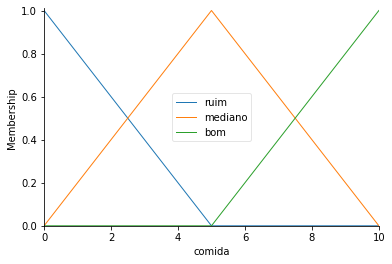

In [14]:
comida.view()

Podemos definir os pontos da função de associação (pertinência) triangular. Para tanto, devemos mapear os valores fuzzy ao universo de maneira direta, como segue no exemplo para a variável gorjeta.

Definindo o OUTPUT:

In [15]:
gorjeta['baixa'] = fz.trimf( gorjeta.universe, [0, 0, 13] )
gorjeta['mediana'] = fz.trimf( gorjeta.universe, [0, 13, 25] )
gorjeta['alta'] = fz.trimf( gorjeta.universe, [13, 25, 25] )

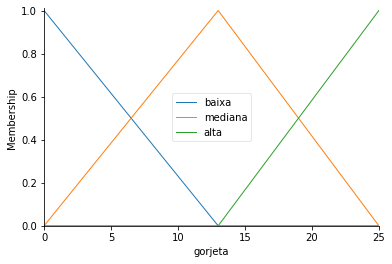

In [16]:
gorjeta.view()

Perceba que temos INPUTS difusos e OUTPUTS difusos, isto é, tanto as variáveis de entrada quanto de saída possuem regiões de sobreposição entre dois ou mais valores semânticos.

Agora vamos definir as REGRAS (antecedentes seguido de consequencias):

In [17]:
regra1 = ctrl.Rule(comida['bom'] | servico['bom'], gorjeta['alta'])
regra2 = ctrl.Rule(servico['mediano'], gorjeta['mediana'])
regra3 = ctrl.Rule(comida['ruim'] & servico['ruim'], gorjeta['baixa'])

Para criar o SISTEMA:

In [18]:
controle_gorjetas = ctrl.ControlSystem([regra1, regra2, regra3])

Agora podemos aplicar nosso sistema de controle de gorjetas.

Podemos usar o mesmo sistema Fuzzy para diferentes controladores, bastando instanciá-los como se segue:

In [19]:
controlador1 = ctrl.ControlSystemSimulation(controle_gorjetas)

controlador1.input['comida'] = 6.5
controlador1.input['servico'] = 9.8

controlador1.compute()

saida = controlador1.output['gorjeta']

print(saida)

19.847607361963192


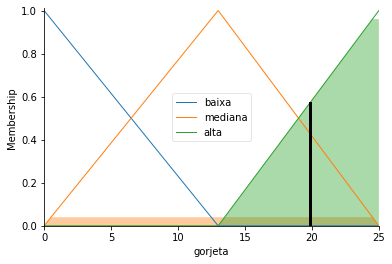

In [20]:
gorjeta.view(sim=controlador1)

In [21]:
print( gorjeta(9.8, 6.5) )
print( gorjeta(4, 4) )
print( gorjeta(2, 2) )
#print( gorjeta(4, 6) )

TypeError: ignored

--------------------------------------------

## Exercício 1 - Você está programando um jogo de quiz para redes sociais, no qual o usuário pode ser classificado como um entre 5 personagens (OUPUT) respondendo 5 perguntas, cada uma com 4 valores (INPUT) possiveis. Faça esse sistema:

### (a) Usando Lógica Classica. Quantas regras você precisou usar?

In [ ]:
### coloque seu código aqui

### (b) Usando Lógica Fuzzy. Quantas regras você precisou usar?

In [ ]:
### coloque seu código aqui

--------------------------------------------

## Exercício 2 - Faça os exemplos de clustering disponíveis em 

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html


In [ ]:
### coloque seu código aqui